# Homework Assignment 1 - (Question 4)

## <u>Case Study</u>: Global City Well-Being Analysis


### Motivation:

Understanding the dynamics of urban living is useful for policymakers, businesses, and individuals considering relocation. By analyzing key factors that contribute to the quality of life in cities, we can gain insights into the strengths and weaknesses of different urban environments. 

Clustering cities based on numerical `"well-being metrics"` like such as:
* `Purchase Power`
* `Health Care`
* `Pollution`
* `Quality of Life`
* `Crime Rating`

allows us to identify patterns and group cities with similar characteristics. 

By analyzing any clusters that we find, this can help people wanting to move make informed decisions about where to live, where to invest, and how to improve urban conditions. The results of such clustering can provide a foundation for further analysis and strategic planning in urban development.




### Dataset Background


The observations in the `movehub_data_cleaned2.csv` file in the zip file contains data for each of these `5 numerical attributes` for each of these for 185 global cities. This data was extracted from movehub.com.
The full dataset and more information about the full dataset can be found here:
https://www.kaggle.com/datasets/blitzr/movehub-city-rankings?select=movehubqualityoflife.csv



### Research Questions

In this analysis we would like to answer the following questions about the dataset.
1. Is this dataset clusterable?
2. If so, how many clusters are there in the dataset?
3. What `well-being metrics` characterize each of the clusters that we find? *For instance, is there a cluster that has lower `purchase power` than others (downside), but also happens to have lower `pollution` than other clusters (upside)? This might be useful for people wanting to move that don't mind having a lower purchase power, if it means living in a city with less pollution.*

<hr>



### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 4.1. Reading and Examining the csv
1. Read the `movehub_data_cleaned2.csv` into a dataframe. Call it df.
2. Show the first 5 rows of this dataframe.

In [2]:
df = pd.read_csv("movehub_data_cleaned2.csv")

In [3]:
df.head()

,City,Country,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Lausanne,Switzerland,90.77,65.85,87.62,73.21,35.55
1,Geneva,Switzerland,61.22,74.88,29.43,82.76,54.36
2,Basel,Switzerland,78.17,79.74,59.18,88.27,28.12
3,Perth,Australia,62.11,80.56,23.53,74.62,50.01
4,Nashville,United States,80.30,60.30,0.00,80.50,25.50


### 4.2. Dataset for Clustering

Let's create a dataframe of just the 5 numerical `well-being metrics` which we intend to cluster, dropping the `City` and `Country` variables.

1. First create a copy of the `df` dataframe you might call it `X`.
2. And then drop the categorical variables. 

Hint: `X=X.drop(['City','Country'], axis=1)`

In [4]:
X = df.copy()

X = X.drop(['City', 'Country'], axis=1)

X.head()

,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,90.77,65.85,87.62,73.21,35.55
1,61.22,74.88,29.43,82.76,54.36
2,78.17,79.74,59.18,88.27,28.12
3,62.11,80.56,23.53,74.62,50.01
4,80.30,60.30,0.00,80.50,25.50


### 4.3. Describing each numerical variable in the dataframe. 

Create a histogram for each of the well-being metrics in the dataset.

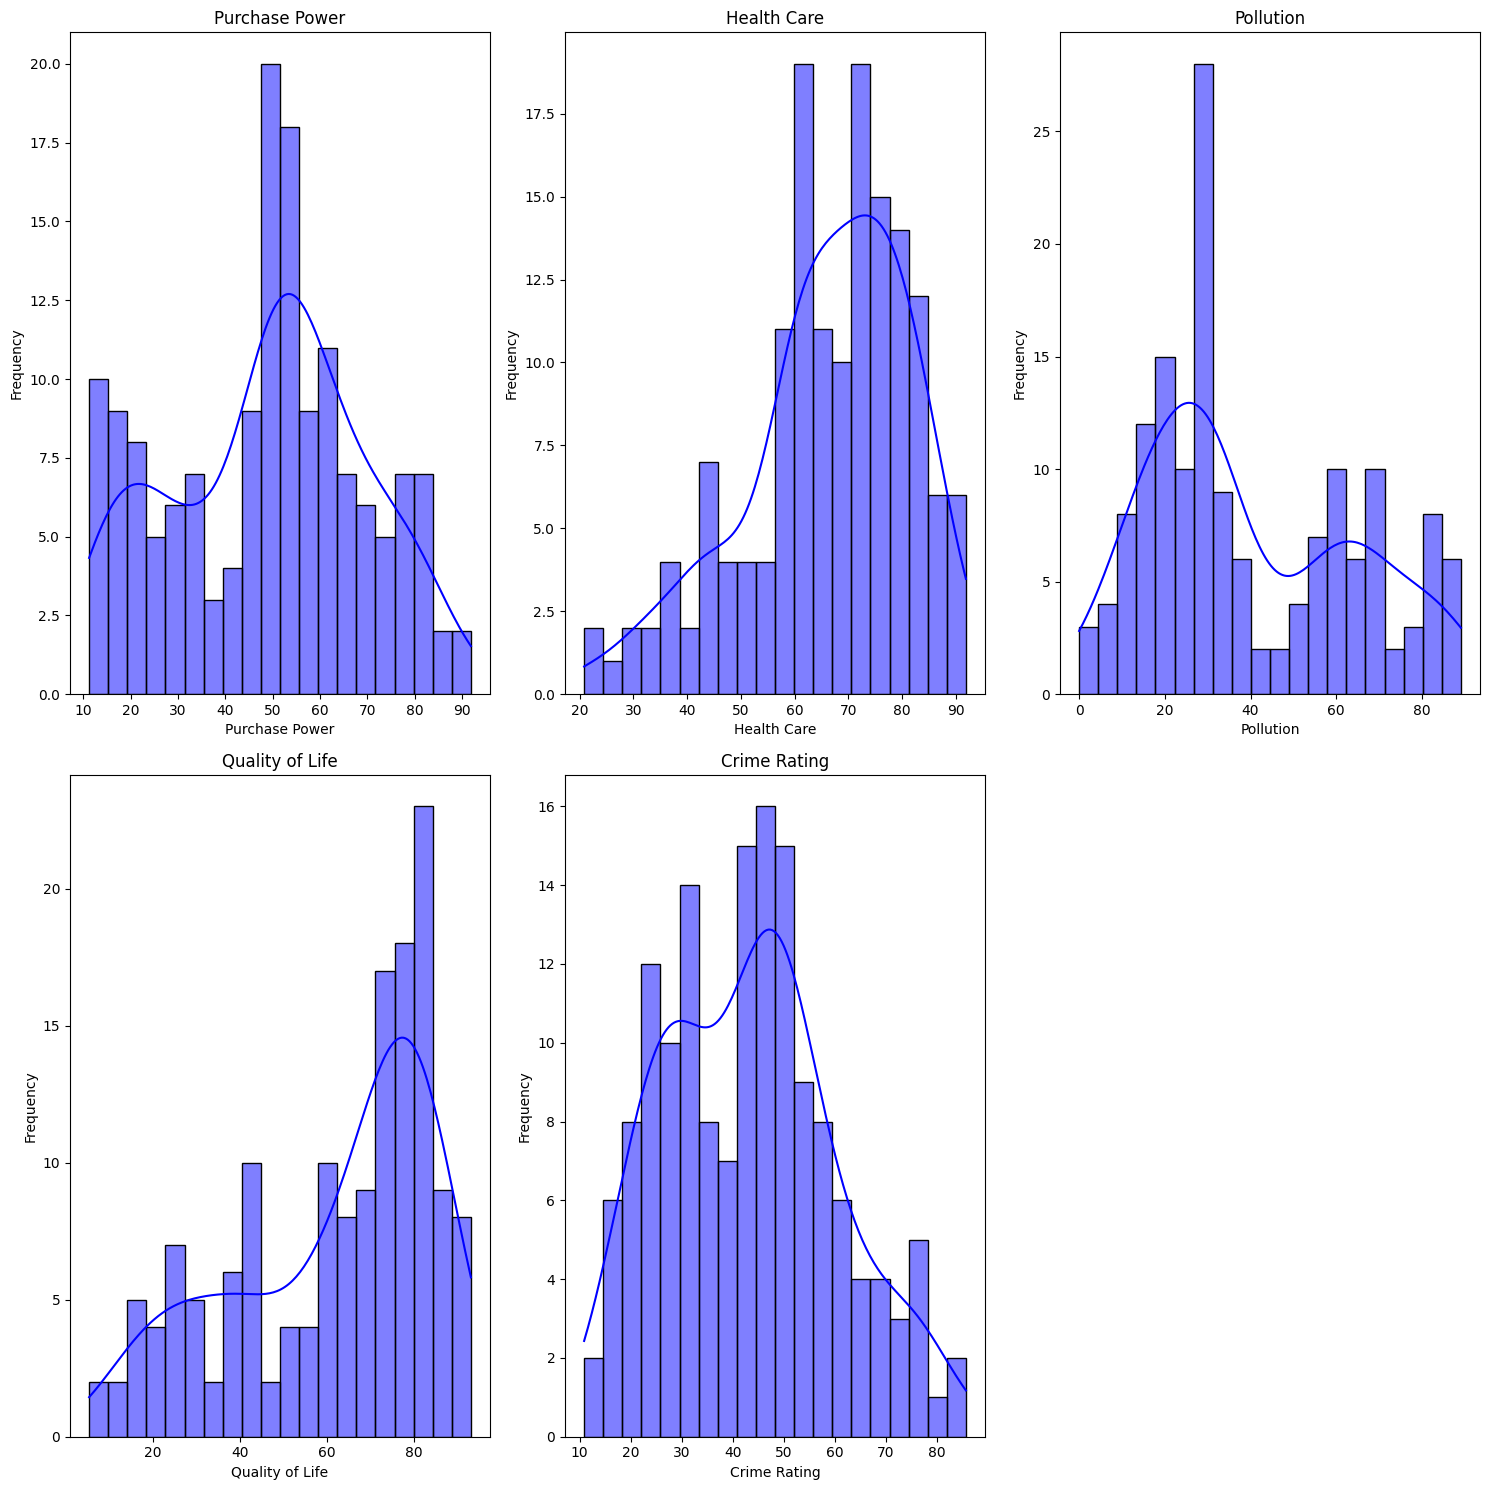

In [5]:
numerical_columns = ['Purchase Power', 'Health Care', 'Pollution', 'Quality of Life', 'Crime Rating']

# Set up the plot
plt.figure(figsize=(15, 15))

# Loop through each numerical column and create a subplot
for i, column in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(X[column], kde=True, bins=20, color='blue')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

### 4.4. Describing the relationship between each pair numerical variable in the dataframe. 

For each pair of well-being metrics in this dataframe, plot a scatterplot.

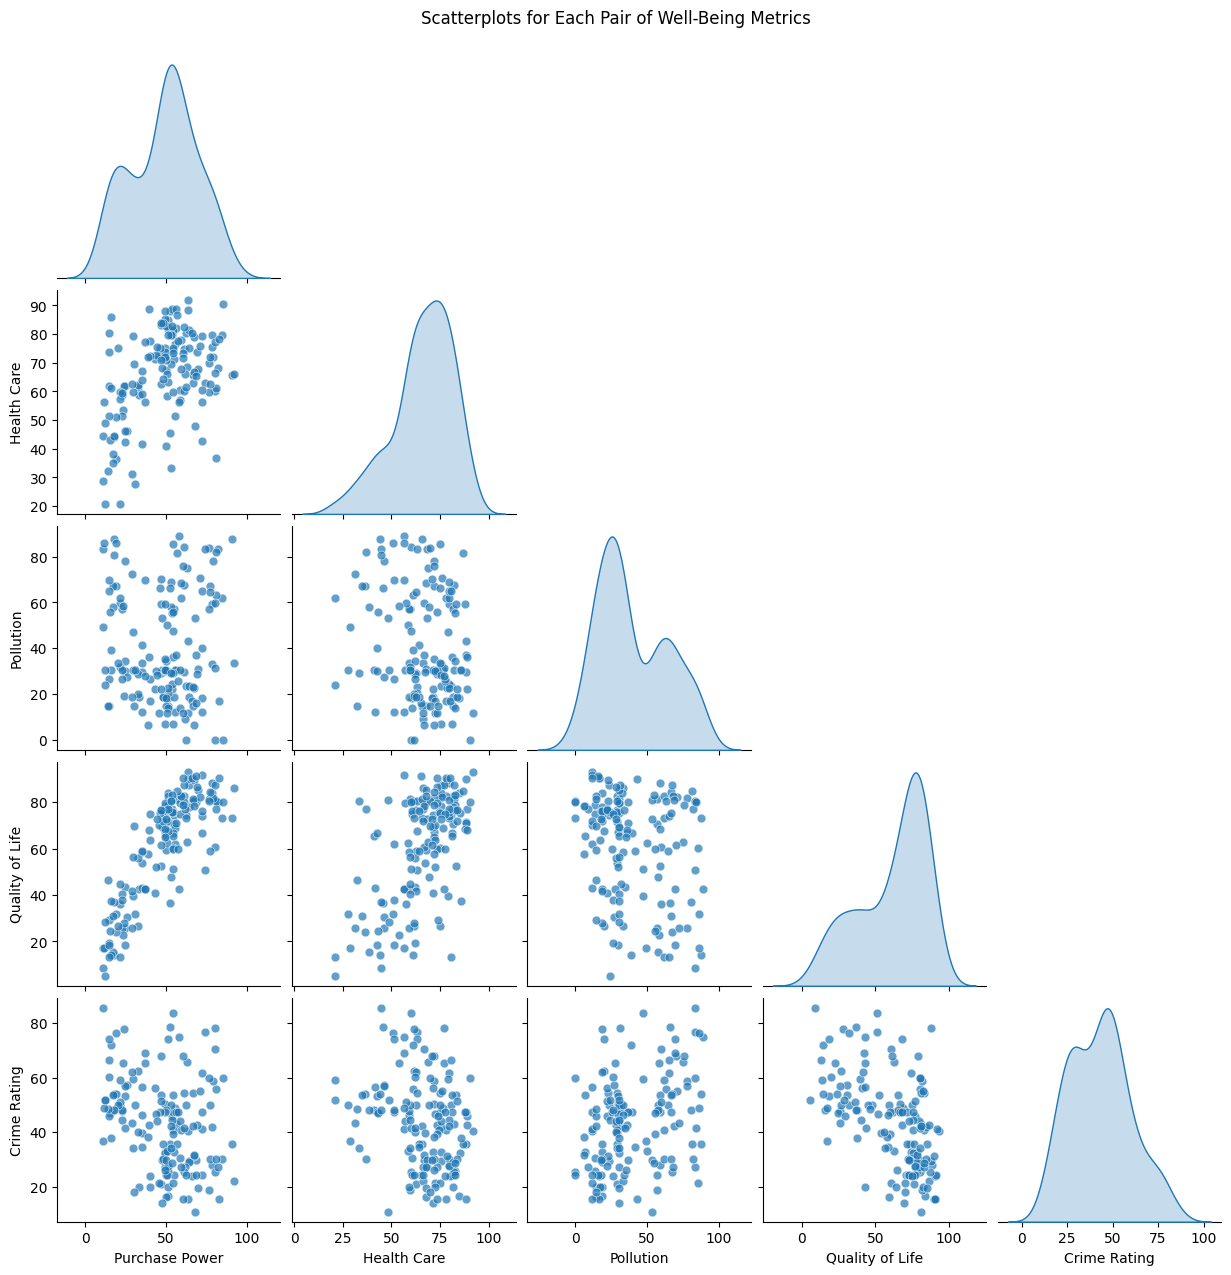

In [6]:
sns.pairplot(X, 
             diag_kind="kde", 
             corner=True, 
             plot_kws={'alpha': 0.7, 's': 40}, 
             diag_kws={'fill': True})

# Display
plt.suptitle("Scatterplots for Each Pair of Well-Being Metrics", y=1.02)
plt.show()


### 4.5. Create an elbow plot for this dataframe X. 

Create an k-means elbow plot for this dataframe X.
* Your elbow plot should consider clusterings with k=1, k=2, ..., k=`15` clusters
* For each k, your elbow plot should find the average inertia of `4` trial clusterings

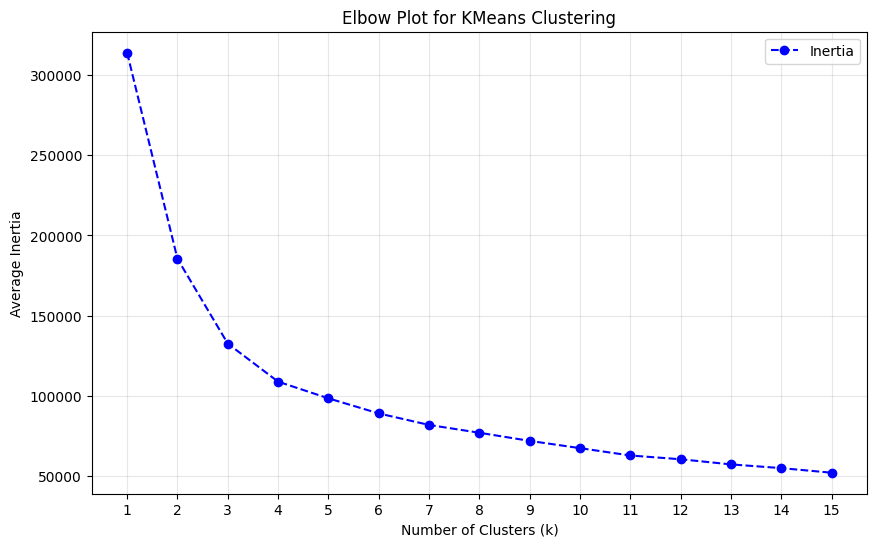

In [7]:
from sklearn.cluster import KMeans
import numpy as np

# elbow plot KMeans
inertia = []
k_values = range(1, 16) 

# AvG inertia over 4 trials
for k in k_values:
    inertia_trials = []
    for _ in range(4):  # Perform 4 trials
        kmeans = KMeans(n_clusters=k, random_state=None, n_init=10, max_iter=300)
        kmeans.fit(X)
        inertia_trials.append(kmeans.inertia_)
    # Append the mean inertia for the current k
    inertia.append(np.mean(inertia_trials))

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='b', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Inertia')
plt.title('Elbow Plot for KMeans Clustering')
plt.xticks(k_values)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

### 4.6. Does this elbow plot suggest that the dataset is clusterable by k-means? Explain.


- The inertia drops sharply up to \(k=3\), showing good clustering potential.  
- The "elbow" appears around \(k=3\) or \(k=4\), suggesting the best cluster numbers.  
- Beyond \(k=4\), adding more clusters gives little improvement.  

Can be done with K-means

### 4.7. How many clusters does this elbow plot suggest we should use in k-means? Explain.
*Somewhat Subjective: As long as your explain yourself and the logic is correct then you will get full credit.*

The plot suggests using **3 clusters** as inertia drops sharply up to \(k=3\), forming a clear "elbow." Beyond \(k=3\), improvements are minimal, and fewer clusters are easier to interpret.

### 4.8. Cluster the data

Using the cluster number that you selected in question above, clusters the dataframe using k-means.

**<u>Note</u>: In sklearn, you can set a random seed for non-deterministic functions by using the random_state parameter. Within your KMeans() function in this problem, you should set an additional parameter with `random_state=777`.**

Save the cluster labels of your final clustering in a new column of the **df** dataframe called 'predicted_cluster'.



In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=777)
kmeans.fit(X)

df['predicted_cluster'] = kmeans.labels_

# Display
df


c:\Users\viraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,City,Country,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,predicted_cluster
0,Lausanne,Switzerland,90.77,65.85,87.62,73.21,35.55,0
1,Geneva,Switzerland,61.22,74.88,29.43,82.76,54.36,2
2,Basel,Switzerland,78.17,79.74,59.18,88.27,28.12,0
3,Perth,Australia,62.11,80.56,23.53,74.62,50.01,2
4,Nashville,United States,80.30,60.30,0.00,80.50,25.50,2
...,...,...,...,...,...,...,...,...
150,Quito,Ecuador,14.24,32.41,14.76,46.43,48.36,1
151,Hanoi,Vietnam,12.22,20.83,24.02,5.29,51.81,1
152,Cairo,Egypt,11.90,56.48,86.16,17.25,48.81,1
153,Karachi,Pakistan,14.63,51.57,69.63,18.50,74.36,1


### 4.9 Create side-by-side boxplots visualizations. 

For each of the `well-being metrics` create a side-by-side boxplots visualization. Within each visualization, there should be a boxplot that corresponds to each `predicted_cluster` label.

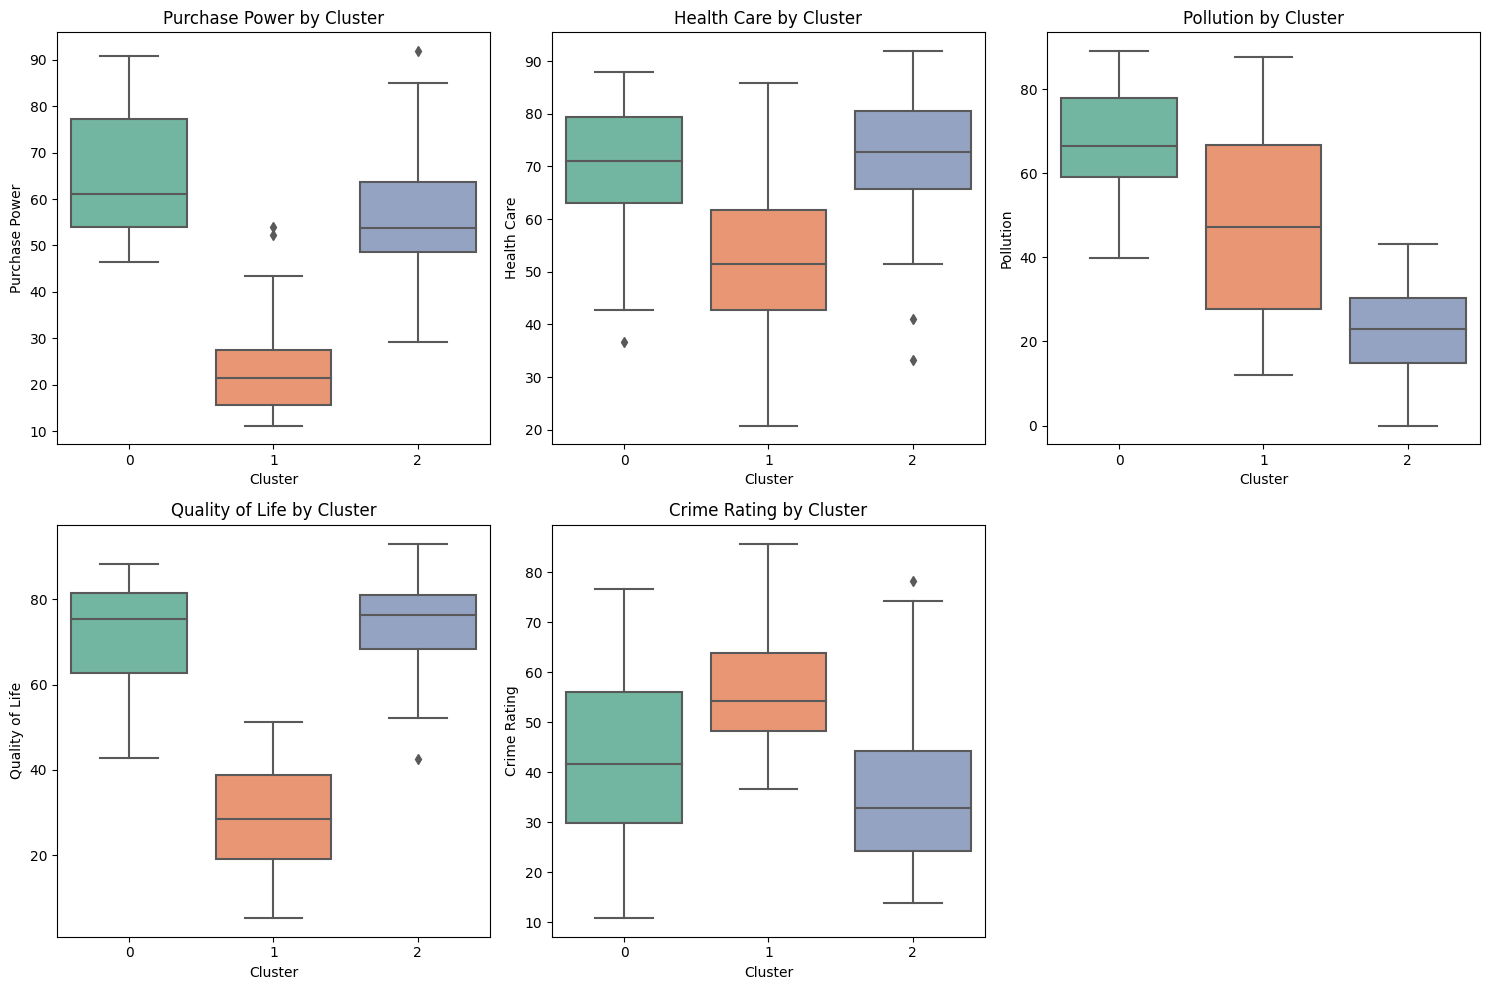

In [9]:
plt.figure(figsize=(15, 10))

# boxplots grouped by predicted clusters
for i, metric in enumerate(numerical_columns): 
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='predicted_cluster', y=metric, data=df, palette='Set2')
    plt.title(f'{metric} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

### 4.10. Describing the clusters 

Finally, let's describe what distinguishes these clusters. For each cluster answer the following questions.
* Did this cluster have the `highest` scores for a particular `well-being metric(s)` (compared to the other clusters)? If so, which metrics(s)?
* Did this cluster have the `lowest` scores for a particular `well-being metric(s)` (compared to the other clusters)? If so, which metrics(s)?

**Note: Unfortunately, even if you fix a random state in the KMeans() function, the LABELS assigned to each of your $k$ CLUSTERS may change, while your actual CLUSTERS themselves will not change.**

For instance, the following two tables below represent two separate ways to *represent* the same clustering of a set of observations (1,2,3,4,5).
* Because observations 1 and 2 were given the same label, they are together in one cluster.
* Because observations 4 and 5 were given the same label, they are together in another cluster.
* Because observations 3 is the only one with this distinct label it is by itself in it's own cluster.


Because the cluster labels (but not the clusters themselves) change in the KMeans() function, it's best to not actually use the cluster label numbers "0,1,2,..." in your description. Just say "one cluster of counties prefers this...", "while another group of counties prefers this...".

<p>&nbsp;</p>
<table style="border: none;border-collapse: collapse;width:267pt;">
    <tbody>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:.5pt solid windowtext;height:28.5pt;width:58pt;">Observation</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-left:none;width:45pt;">Cluster Labels</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:none;width:51pt;"><br></td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:.5pt solid windowtext;width:62pt;">Observation</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-left:none;width:51pt;">Cluster Labels</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:none;"><br></td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;">1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">Nick</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:none;"><br></td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;">2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">Nick</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:none;"><br></td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;">3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">Joe</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:none;"><br></td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;">4</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">Kevin</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">5</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:none;"><br></td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;">5</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">Kevin</td>
        </tr>
    </tbody>
</table>

- **Cluster 1 (Low Scores):**  
  Lowest scores in **Purchase Power, Health Care, and Quality of Life**.  
  Higher **Pollution** and **Crime Ratings**, representing challenging living conditions.  

- **Cluster 2 (Moderate Scores):**  
  Mid-range scores across all metrics.  
  Represents cities with balanced but average living conditions.  

- **Cluster 3 (High Scores):**  
  Highest scores in **Purchase Power, Health Care, and Quality of Life**.  
  Lowest **Pollution** and **Crime Ratings**, representing highly livable cities.  
  
Cluster 1 struggles, Cluster 2 is balanced, and Cluster 3 excels in well-being.
